# 1. 데이터 불러오기

In [138]:
import statsmodels.formula.api as sm
import pandas as pd
import seaborn as sns

df = pd.read_csv('churn.csv', index_col = 0)
df.head(490)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


# 2. 데이터 전처리

## 2.1. 데이터 정제

In [139]:
import numpy as np
df.replace(" ", np.NaN, inplace=True)
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [140]:
df.dropna(subset = ["TotalCharges"], inplace=True)
df.head(490)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


In [141]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 2.2. 데이터 타입 변경

In [143]:
print(df.dtypes)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


In [145]:
print(df.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


## 2.3 범주형 데이터 처리

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,2,1,2,1,1,1,1,0,1,1,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,1,2,2,1,2,1,1,1,1,0,0,56.95,1889.5,0
3668-QPYBK,0,0,0,0,2,1,1,2,2,2,1,1,1,1,0,1,0,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0,2,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,1,1,1,1,1,1,1,1,0,1,1,70.70,151.65,1


## 2.4 상관계수 분석

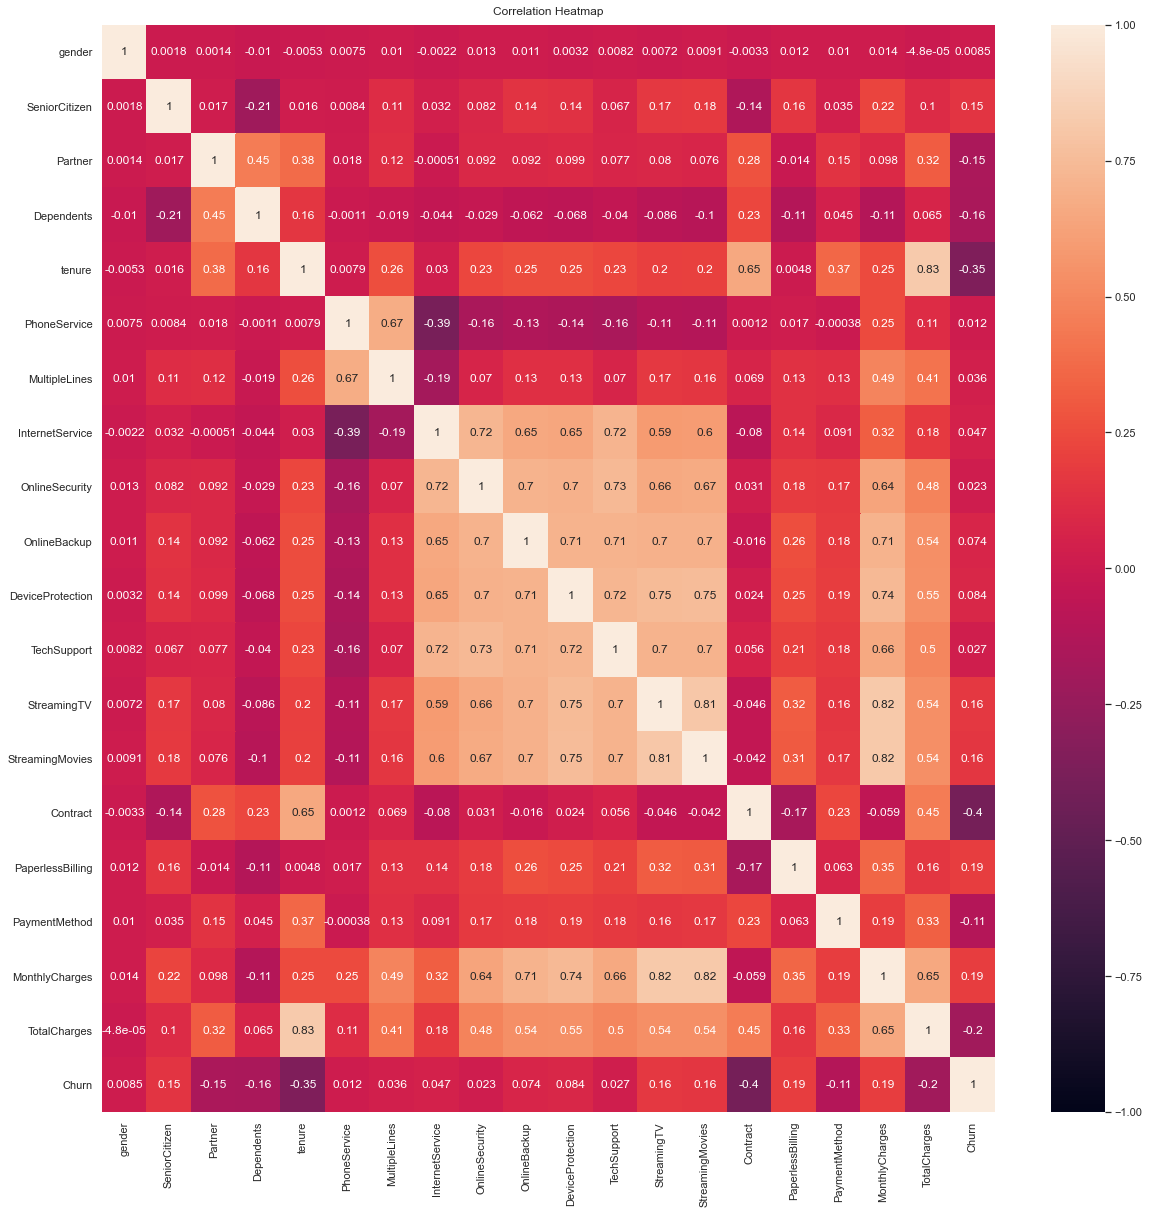

## 2.5. 데이터 분할(학습 vs. 평가)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
0572-ZJKLT,1,0,1,1,46,1,2,1,2,1,2,2,1,2,1,0,0,99.65,4630.20,0
7562-UXTPG,1,0,0,0,13,1,1,1,1,1,1,1,1,1,0,1,0,70.15,886.70,0
4335-BSMJS,1,0,0,0,62,1,2,0,0,0,0,0,0,0,1,1,3,25.80,1563.95,0
5502-RLUYV,1,0,1,1,69,1,2,1,1,2,2,1,2,2,0,1,1,103.95,7446.90,1
8763-KIAFH,1,0,1,1,27,1,1,0,0,0,0,0,0,0,1,1,0,20.55,583.30,0


# 3. 회귀분석

## 3.1 로지스틱 회귀분석

In [147]:
col=df_train.shape[1]
all_columns = "+".join(df_train.columns[0:col-1])
my_formula = "Churn~" + all_columns
log_reg = sm.logit(formula=my_formula, data=df_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.418334
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5254
Method:                           MLE   Df Model:                           19
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.2830
Time:                        15:23:04   Log-Likelihood:                -2206.3
converged:                       True   LL-Null:                       -3077.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6849      0.215     -3.186      0.001      -1.106      -0.264
gender     

In [148]:
sel_var=[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
all_columns = "+".join(df_train.columns[sel_var])
my_formula = "Churn~" + all_columns
log_reg = sm.logit(formula=my_formula, data=df_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.418338
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5256
Method:                           MLE   Df Model:                           17
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.2830
Time:                        15:23:09   Log-Likelihood:                -2206.3
converged:                       True   LL-Null:                       -3077.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6783      0.211     -3.209      0.001      -1.093      -0.264
SeniorCitiz

## 3.2. 성능 평가

### 3.2.1. 학습데이터

In [155]:
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(df_train.iloc[:,sel_var])
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(df_train['Churn'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(df_train['Churn'], predictions))
print('recall_score (sensitivity) = ', recall_score(df_train['Churn'], predictions)) # sensitivity
print('specificity = ', cm[0,0]/(cm[0,0]+cm[0,1])) # specificity

Confusion Matrix : 
 [[3431  418]
 [ 617  808]]
Test accuracy =  0.8037542662116041
recall_score (sensitivity) =  0.5670175438596491
specificity =  0.8914003637308392


### 3.2.2. 평가데이터

Confusion Matrix : 
 [[1160  154]
 [ 193  251]]
Test accuracy =  0.8026166097838453
recall_score (sensitivity) =  0.5653153153153153
specificity =  0.882800608828006
